In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

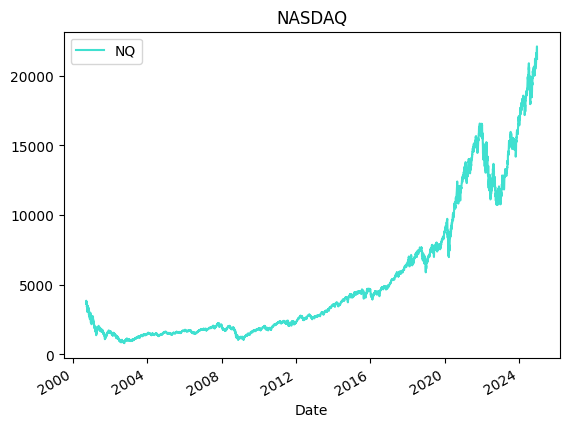

In [2]:
tickerData_nq = yf.Ticker('NQ=F')
data_nq = tickerData_nq.history(period='1d', start='2000-1-1', end='2024-12-19')
data_nq['Close'].plot(color = 'turquoise', label = 'NQ')
plt.title('NASDAQ')
plt.legend()
plt.show()

In [3]:
data_nq = data_nq.dropna()
data_nq = data_nq.drop(columns= ['Dividends', 'Stock Splits', 'High', 'Low'])
data_nq

,Open,Close,Volume
Date,,,
2000-09-18 00:00:00-04:00,3721.00,3653.50,72994
2000-09-19 00:00:00-04:00,3658.50,3804.00,70029
2000-09-20 00:00:00-04:00,3801.50,3853.00,78832
2000-09-21 00:00:00-04:00,3852.00,3765.00,70719
2000-09-22 00:00:00-04:00,3673.00,3776.00,55926
...,...,...,...
2024-12-12 00:00:00-05:00,21756.75,21651.25,510307
2024-12-13 00:00:00-05:00,21720.75,21795.75,639403
2024-12-16 00:00:00-05:00,21780.25,22110.25,482433
